**AI HARDWARE PROJECT**


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import tensorflow as tf
tf.config.run_functions_eagerly(True)


**Load dataset**

In [ ]:
file = open("next_word_data.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


**Data** **cleaning**

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

**Tokenizer**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

**Data splitting**

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Model Create**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


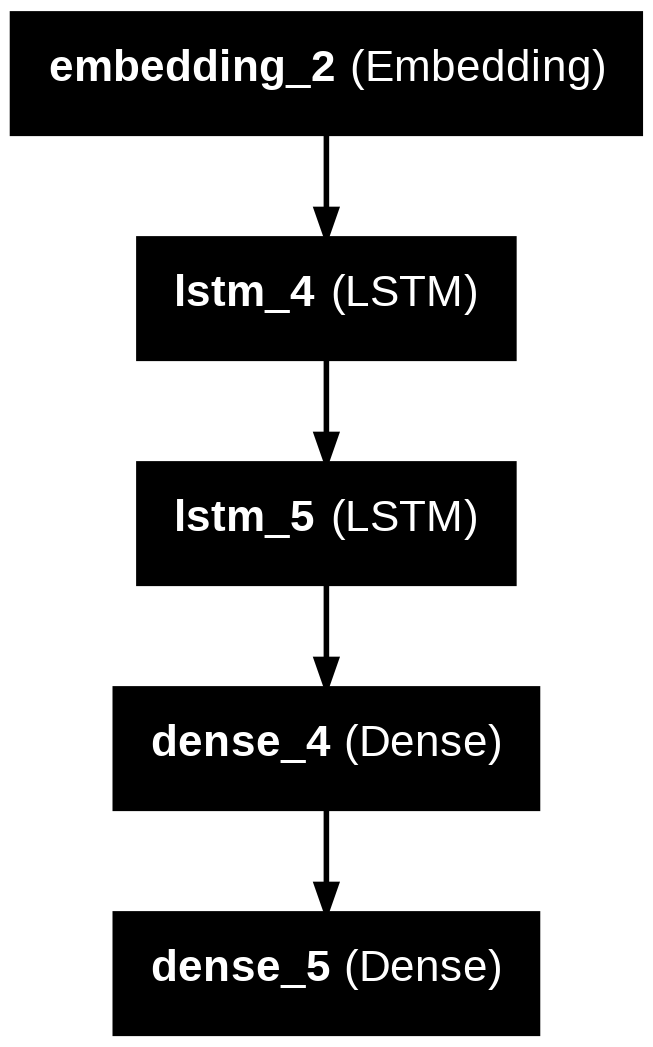

In [ ]:
from tensorflow.keras.utils import plot_model

model.build(input_shape=(None, 1))

plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy')


In [ ]:
history = model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7.8720
Epoch 1: loss improved from inf to 7.87531, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 7.8721 - learning_rate: 0.0010
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 7.8625
Epoch 2: loss improved from 7.87531 to 7.86077, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 7.8625 - learning_rate: 0.0010
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.8099
Epoch 3: loss improved from 7.86077 to 7.81170, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 7.8099 - learning_rate: 0.0010
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 7.6036
Epoch 4: loss improved from 7.81170 to 7.60203, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 7.6036 - learning_rate: 0.0010
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7.4042
Epoch 5: loss improved from 7.60203 to 7.40015, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 7.4042 - learning_rate: 0.0010
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 7.2281
Epoch 6: loss improved from 7.40015 to 7.23968, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 7.2283 - learning_rate: 0.0010
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 7.1193
Epoch 7: loss improved from 7.23968 to 7.13493, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 7.1196 - learning_rate: 0.0010
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.0390
Epoch 8: loss improved from 7.13493 to 7.05601, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 7.0393 - learning_rate: 0.0010
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 6.9285
Epoch 9: loss improved from 7.05601 to 6.94176, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 6.9288 - learning_rate: 0.0010
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 6.6801
Epoch 10: loss improved from 6.94176 to 6.72512, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 6.6808 - learning_rate: 0.0010
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 6.4126
Epoch 11: loss improved from 6.72512 to 6.44649, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 6.4132 - learning_rate: 0.0010
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 6.1639
Epoch 12: loss improved from 6.44649 to 6.21779, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 6.1648 - learning_rate: 0.0010
Epoch 13/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 5.9187
Epoch 13: loss improved from 6.21779 to 5.98573, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 5.9197 - learning_rate: 0.0010
Epoch 14/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 5.6996
Epoch 14: loss improved from 5.98573 to 5.78592, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 5.7010 - learning_rate: 0.0010
Epoch 15/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 5.4689
Epoch 15: loss improved from 5.78592 to 5.59248, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 5.4709 - learning_rate: 0.0010
Epoch 16/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 5.3229
Epoch 16: loss improved from 5.59248 to 5.45329, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 5.3250 - learning_rate: 0.0010
Epoch 17/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 5.1231
Epoch 17: loss improved from 5.45329 to 5.27883, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 5.1256 - learning_rate: 0.0010
Epoch 18/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 4.9460
Epoch 18: loss improved from 5.27883 to 5.10555, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 4.9486 - learning_rate: 0.0010
Epoch 19/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.8119
Epoch 19: loss improved from 5.10555 to 4.95220, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 4.8142 - learning_rate: 0.0010
Epoch 20/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.6518
Epoch 20: loss improved from 4.95220 to 4.84205, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 4.6549 - learning_rate: 0.0010
Epoch 21/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 4.5455
Epoch 21: loss improved from 4.84205 to 4.70733, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 4.5481 - learning_rate: 0.0010
Epoch 22/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 4.3848
Epoch 22: loss improved from 4.70733 to 4.58201, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 4.3880 - learning_rate: 0.0010
Epoch 23/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.2511
Epoch 23: loss improved from 4.58201 to 4.45807, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 4.2545 - learning_rate: 0.0010
Epoch 24/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 4.1432
Epoch 24: loss improved from 4.45807 to 4.32448, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 4.1462 - learning_rate: 0.0010
Epoch 25/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 3.9526
Epoch 25: loss improved from 4.32448 to 4.15305, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 3.9559 - learning_rate: 0.0010
Epoch 26/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 3.7967
Epoch 26: loss improved from 4.15305 to 3.99491, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 3.7999 - learning_rate: 0.0010
Epoch 27/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 3.6781
Epoch 27: loss improved from 3.99491 to 3.83971, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 3.6807 - learning_rate: 0.0010
Epoch 28/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 3.4706
Epoch 28: loss improved from 3.83971 to 3.69154, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 3.4742 - learning_rate: 0.0010
Epoch 29/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 3.3451
Epoch 29: loss improved from 3.69154 to 3.53778, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 3.3482 - learning_rate: 0.0010
Epoch 30/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 3.2121
Epoch 30: loss improved from 3.53778 to 3.44234, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 3.2158 - learning_rate: 0.0010
Epoch 31/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3.1048
Epoch 31: loss improved from 3.44234 to 3.32028, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.1082 - learning_rate: 0.0010
Epoch 32/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 2.9413
Epoch 32: loss improved from 3.32028 to 3.19547, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 2.9454 - learning_rate: 0.0010
Epoch 33/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2.8858
Epoch 33: loss improved from 3.19547 to 3.13208, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 2.8898 - learning_rate: 0.0010
Epoch 34/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 2.8317
Epoch 34: loss improved from 3.13208 to 3.05384, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 2.8353 - learning_rate: 0.0010
Epoch 35/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2.6882
Epoch 35: loss improved from 3.05384 to 2.93995, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 2.6923 - learning_rate: 0.0010
Epoch 36/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 2.6547
Epoch 36: loss improved from 2.93995 to 2.87436, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 2.6583 - learning_rate: 0.0010
Epoch 37/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 2.5678
Epoch 37: loss improved from 2.87436 to 2.78538, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.5713 - learning_rate: 0.0010
Epoch 38/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2.4428
Epoch 38: loss improved from 2.78538 to 2.71322, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 2.4472 - learning_rate: 0.0010
Epoch 39/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2.4248
Epoch 39: loss improved from 2.71322 to 2.65543, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.4285 - learning_rate: 0.0010
Epoch 40/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2.3466
Epoch 40: loss improved from 2.65543 to 2.60233, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 2.3507 - learning_rate: 0.0010
Epoch 41/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2.3736
Epoch 41: loss improved from 2.60233 to 2.55037, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 2.3764 - learning_rate: 0.0010
Epoch 42/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 2.2619
Epoch 42: loss improved from 2.55037 to 2.49966, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.2658 - learning_rate: 0.0010
Epoch 43/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.2138
Epoch 43: loss improved from 2.49966 to 2.42816, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 2.2172 - learning_rate: 0.0010
Epoch 44/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2.1745
Epoch 44: loss improved from 2.42816 to 2.39032, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 2.1780 - learning_rate: 0.0010
Epoch 45/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2.1195
Epoch 45: loss improved from 2.39032 to 2.34319, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 2.1231 - learning_rate: 0.0010
Epoch 46/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2.0487
Epoch 46: loss improved from 2.34319 to 2.29815, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.0528 - learning_rate: 0.0010
Epoch 47/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2.0135
Epoch 47: loss improved from 2.29815 to 2.24865, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 2.0173 - learning_rate: 0.0010
Epoch 48/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.0037
Epoch 48: loss improved from 2.24865 to 2.23509, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 2.0074 - learning_rate: 0.0010
Epoch 49/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 2.0257
Epoch 49: loss did not improve from 2.23509
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 2.0290 - learning_rate: 0.0010
Epoch 50/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.9667
Epoch 50: loss improved from 2.23509 to 2.18157, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 1.9701 - learning_rate: 0.0010
Epoch 51/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 1.9041
Epoch 51: loss improved from 2.18157 to 2.10960, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 1.9074 - learning_rate: 0.0010
Epoch 52/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.8715
Epoch 52: loss improved from 2.10960 to 2.08665, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 1.8749 - learning_rate: 0.0010
Epoch 53/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 1.8167
Epoch 53: loss improved from 2.08665 to 2.04058, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 1.8203 - learning_rate: 0.0010
Epoch 54/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 1.7969
Epoch 54: loss improved from 2.04058 to 2.02707, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 1.8006 - learning_rate: 0.0010
Epoch 55/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.8262
Epoch 55: loss improved from 2.02707 to 2.02580, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 1.8294 - learning_rate: 0.0010
Epoch 56/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 1.7572
Epoch 56: loss improved from 2.02580 to 1.98251, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 1.7608 - learning_rate: 0.0010
Epoch 57/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 1.7463
Epoch 57: loss improved from 1.98251 to 1.93135, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 1.7493 - learning_rate: 0.0010
Epoch 58/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 1.6931
Epoch 58: loss improved from 1.93135 to 1.91763, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 1.6967 - learning_rate: 0.0010
Epoch 59/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.7235
Epoch 59: loss improved from 1.91763 to 1.89484, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 1.7263 - learning_rate: 0.0010
Epoch 60/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 1.6494
Epoch 60: loss improved from 1.89484 to 1.84521, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 1.6526 - learning_rate: 0.0010
Epoch 61/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 1.6131
Epoch 61: loss improved from 1.84521 to 1.82327, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 1.6164 - learning_rate: 0.0010
Epoch 62/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 1.5831
Epoch 62: loss improved from 1.82327 to 1.80634, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.5867 - learning_rate: 0.0010
Epoch 63/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 1.6140
Epoch 63: loss improved from 1.80634 to 1.80025, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 1.6170 - learning_rate: 0.0010
Epoch 64/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 1.5729
Epoch 64: loss improved from 1.80025 to 1.75063, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.5758 - learning_rate: 0.0010
Epoch 65/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 1.5293
Epoch 65: loss improved from 1.75063 to 1.71543, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 1.5323 - learning_rate: 0.0010
Epoch 66/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 1.5564
Epoch 66: loss improved from 1.71543 to 1.70793, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 1.5588 - learning_rate: 0.0010
Epoch 67/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.4898
Epoch 67: loss improved from 1.70793 to 1.69608, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 1.4931 - learning_rate: 0.0010
Epoch 68/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1.4902
Epoch 68: loss did not improve from 1.69608
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 1.4936 - learning_rate: 0.0010
Epoch 69/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 1.5166
Epoch 69: loss did not improve from 1.69608
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 1.5199 - learning_rate: 0.0010
Epoch 70/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 1.5108
Epoch 70: loss did not improve from 1.69608

Epoch 70: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.5138 - learning_rate: 0.0010
Epoch 71/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1.2452
Epoch 71: loss improved from 1.69608 to 1.26203, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 1.2455 - learning_rate: 2.0000e-04
Epoch 72/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 1.0989
Epoch 72: loss improved from 1.26203 to 1.09853, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 1.0989 - learning_rate: 2.0000e-04
Epoch 73/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.9967
Epoch 73: loss improved from 1.09853 to 1.03040, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.9972 - learning_rate: 2.0000e-04
Epoch 74/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.9325
Epoch 74: loss improved from 1.03040 to 0.99107, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.9334 - learning_rate: 2.0000e-04
Epoch 75/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.9088
Epoch 75: loss improved from 0.99107 to 0.96640, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 0.9097 - learning_rate: 2.0000e-04
Epoch 76/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.8914
Epoch 76: loss improved from 0.96640 to 0.94893, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.8923 - learning_rate: 2.0000e-04
Epoch 77/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.8760
Epoch 77: loss improved from 0.94893 to 0.93363, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.8769 - learning_rate: 2.0000e-04
Epoch 78/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.8617
Epoch 78: loss improved from 0.93363 to 0.92334, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.8627 - learning_rate: 2.0000e-04
Epoch 79/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8381
Epoch 79: loss improved from 0.92334 to 0.91409, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.8393 - learning_rate: 2.0000e-04
Epoch 80/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.8496
Epoch 80: loss improved from 0.91409 to 0.90633, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.8505 - learning_rate: 2.0000e-04
Epoch 81/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8299
Epoch 81: loss improved from 0.90633 to 0.90014, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.8310 - learning_rate: 2.0000e-04
Epoch 82/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.8231
Epoch 82: loss improved from 0.90014 to 0.89192, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.8242 - learning_rate: 2.0000e-04
Epoch 83/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.8086
Epoch 83: loss improved from 0.89192 to 0.88671, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.8099 - learning_rate: 2.0000e-04
Epoch 84/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.7991
Epoch 84: loss improved from 0.88671 to 0.88092, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.8004 - learning_rate: 2.0000e-04
Epoch 85/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.8131
Epoch 85: loss improved from 0.88092 to 0.87622, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.8141 - learning_rate: 2.0000e-04
Epoch 86/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.8205
Epoch 86: loss improved from 0.87622 to 0.87123, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 0.8213 - learning_rate: 2.0000e-04
Epoch 87/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.8174
Epoch 87: loss improved from 0.87123 to 0.86410, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.8182 - learning_rate: 2.0000e-04
Epoch 88/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.7964
Epoch 88: loss improved from 0.86410 to 0.86337, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.7975 - learning_rate: 2.0000e-04
Epoch 89/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7980
Epoch 89: loss improved from 0.86337 to 0.86037, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.7990 - learning_rate: 2.0000e-04
Epoch 90/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7684
Epoch 90: loss improved from 0.86037 to 0.85457, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.7697 - learning_rate: 2.0000e-04
Epoch 91/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.8147
Epoch 91: loss improved from 0.85457 to 0.85186, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.8153 - learning_rate: 2.0000e-04
Epoch 92/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.7883
Epoch 92: loss improved from 0.85186 to 0.84901, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.7892 - learning_rate: 2.0000e-04
Epoch 93/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.7777
Epoch 93: loss improved from 0.84901 to 0.84653, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.7789 - learning_rate: 2.0000e-04
Epoch 94/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7655
Epoch 94: loss improved from 0.84653 to 0.83781, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.7667 - learning_rate: 2.0000e-04
Epoch 95/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.7702
Epoch 95: loss improved from 0.83781 to 0.83508, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.7713 - learning_rate: 2.0000e-04
Epoch 96/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.7714
Epoch 96: loss improved from 0.83508 to 0.83218, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.7723 - learning_rate: 2.0000e-04
Epoch 97/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.7782
Epoch 97: loss improved from 0.83218 to 0.83202, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.7791 - learning_rate: 2.0000e-04
Epoch 98/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7512
Epoch 98: loss improved from 0.83202 to 0.82761, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.7524 - learning_rate: 2.0000e-04
Epoch 99/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.7629
Epoch 99: loss did not improve from 0.82761
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.7640 - learning_rate: 2.0000e-04
Epoch 100/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.7639
Epoch 100: loss improved from 0.82761 to 0.82126, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.7648 - learning_rate: 2.0000e-04


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

In [ ]:
model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

In [ ]:
import numpy as np

def Predict_Next_Words(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])[0]

    if not sequence:
        print("Word not found in tokenizer vocabulary. Defaulting to 'the'.")
        return "the"

    sequence = np.array(sequence)
    sequence = np.expand_dims(sequence, axis=0)

    preds = model.predict(sequence)
    predicted_index = np.argmax(preds, axis=-1)[0]

    predicted_word = tokenizer.index_word.get(predicted_index, "the")
    print(predicted_word)

    return predicted_word


In [ ]:
text = input("Enter your line: ")

try:
    text=text.rstrip()
    text = text.split(" ")
    text = text[-1]

    prediction = Predict_Next_Words(model, tokenizer, text)
    print("Prediction:", prediction)

except Exception as e:
    print(f"Error: {e}")



Enter your line: i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
still
Prediction: still


**Convert To tensorflow lite**

In [ ]:
import tensorflow as tf
import os

model = tf.keras.models.load_model("nextword1.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.experimental_enable_resource_variables = True

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

converter._experimental_lower_tensor_list_ops = False

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quantized_model = converter.convert()

tflite_model_path = "model_quantized.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_quantized_model)

size_bytes = os.path.getsize(tflite_model_path)
size_mb = size_bytes / (1024 * 1024)
print(f"Quantized TFLite model size: {size_mb:.2f} MB")


Saved artifact at '/tmp/tmp5ditomx7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2617), dtype=tf.float32, name=None)
Captures:
  139107507853200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507853584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507853008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507855504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507853392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507854352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507857232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507857616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507859344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507859152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139107507860112: Tenso